In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go
import plotly.express as px
from sklearn.metrics import silhouette_score

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('\Semester 6\SDR\Tubes'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

\Semester 6\SDR\Tubes\Credit scoring.ipynb
\Semester 6\SDR\Tubes\Credit_Scoring.ipynb
\Semester 6\SDR\Tubes\Deskripsi Dataset.png
\Semester 6\SDR\Tubes\german_credit_data.csv
\Semester 6\SDR\Tubes\.ipynb_checkpoints\Credit_Scoring-checkpoint.ipynb


# Load Dataset

In [3]:
df = pd.read_csv('german_credit_data.csv')
df.shape

(1000, 10)

In [4]:
df

Unnamed: 0  Age     Sex  Job Housing Saving accounts Checking account  \
0             0   67    male    2     own             NaN           little   
1             1   22  female    2     own          little         moderate   
2             2   49    male    1     own          little              NaN   
3             3   45    male    2    free          little           little   
4             4   53    male    2    free          little           little   
..          ...  ...     ...  ...     ...             ...              ...   
995         995   31  female    1     own          little              NaN   
996         996   40    male    3     own          little           little   
997         997   38    male    2     own          little              NaN   
998         998   23    male    2    free          little           little   
999         999   27    male    2     own        moderate         moderate   

     Credit amount  Duration              Purpose  
0             1169         6             radio/TV  
1             5951        48             radio/TV  
2             2096        12            education  
3             7882        42  furniture/equipment  
4             4870        24                  car  
..             ...       ...                  ...  
995           1736        12  furniture/equipment  
996           3857        30                  car  
997            804        12             radio/TV  
998           1845        45             radio/TV  
999           4576        45                  car  

[1000 rows x 10 columns]

In [5]:
df = pd.read_csv('german_credit_data.csv', index_col=0)
df.head()

Age     Sex  Job Housing Saving accounts Checking account  Credit amount  \
0   67    male    2     own             NaN           little           1169   
1   22  female    2     own          little         moderate           5951   
2   49    male    1     own          little              NaN           2096   
3   45    male    2    free          little           little           7882   
4   53    male    2    free          little           little           4870   

   Duration              Purpose  
0         6             radio/TV  
1        48             radio/TV  
2        12            education  
3        42  furniture/equipment  
4        24                  car

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 78.1+ KB


In [7]:
df.describe()

Age          Job  Credit amount     Duration
count  1000.000000  1000.000000    1000.000000  1000.000000
mean     35.546000     1.904000    3271.258000    20.903000
std      11.375469     0.653614    2822.736876    12.058814
min      19.000000     0.000000     250.000000     4.000000
25%      27.000000     2.000000    1365.500000    12.000000
50%      33.000000     2.000000    2319.500000    18.000000
75%      42.000000     2.000000    3972.250000    24.000000
max      75.000000     3.000000   18424.000000    72.000000

### Identifying the missing value

In [8]:
df.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

# Data visualization

In [9]:
df['Cicil'] = df['Credit amount'] / df['Duration']

<AxesSubplot:>

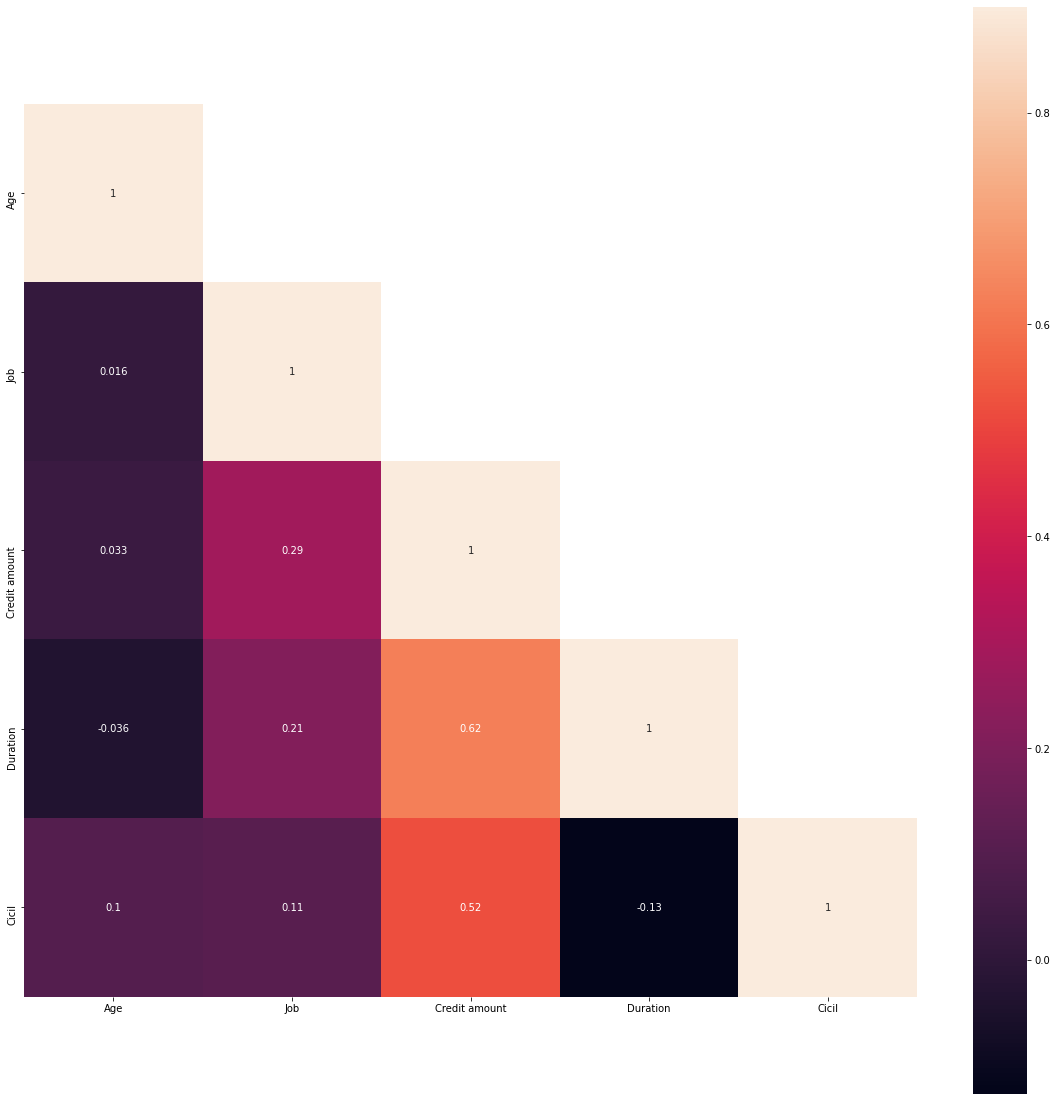

In [10]:
#create correlation with heatmap
corr = df.corr(method = 'pearson')

#convert correlation to numpy array
mask = np.array(corr)

#to mask the repetitive value for each pair
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize = (15,12))
fig.set_size_inches(20,20)
sns.heatmap(corr, mask = mask, vmax = 0.9, square = True, annot = True)

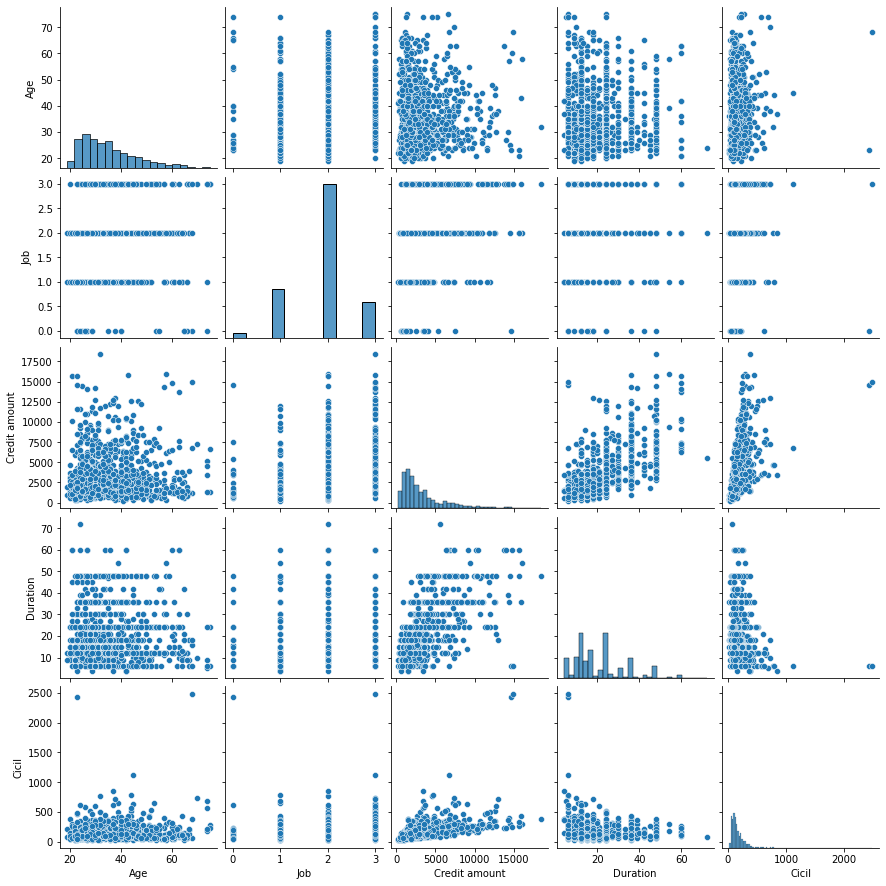

In [11]:
sns.pairplot(df)

Text(0.5, 1.0, 'Jumlah dan tujuan mengambil kredit')

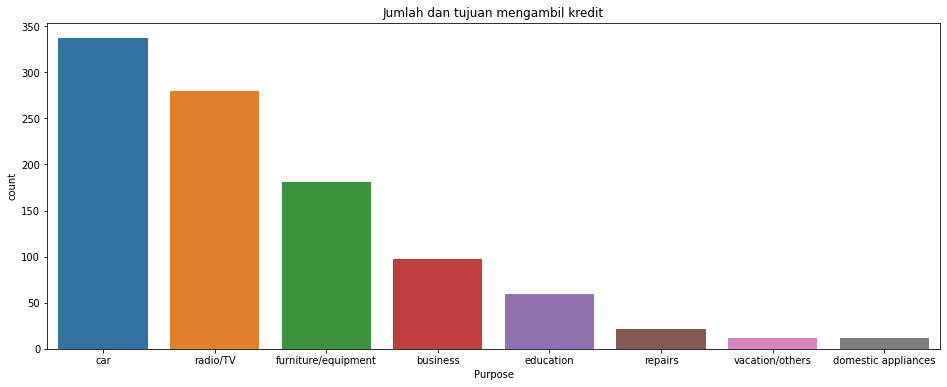

In [12]:
plt.figure(figsize=(16, 6))
sns.countplot(x='Purpose', data=df,
              order = df['Purpose'].value_counts().index).set_title('Jumlah dan tujuan mengambil kredit')

In [13]:
purpose = df.groupby(by='Purpose').mean()['Age']
purpose_df = pd.DataFrame({'Purpose' : purpose.index, 'Age' : purpose.values.astype(int)})
fig = px.line(purpose_df, x="Purpose", y="Age", title='Rata-rata umur pada setiap tujuan kredit')
fig.show()

In [14]:
df.groupby(by='Housing').mean()

Age       Job  Credit amount   Duration       Cicil
Housing                                                           
free     43.814815  2.157407    4906.212963  27.453704  192.566092
own      35.593268  1.879383    3060.939691  20.328191  162.291174
rent     30.368715  1.849162    3122.553073  19.240223  174.169135

c:\users\labid ubed\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Distribution Plot of Credit amount')

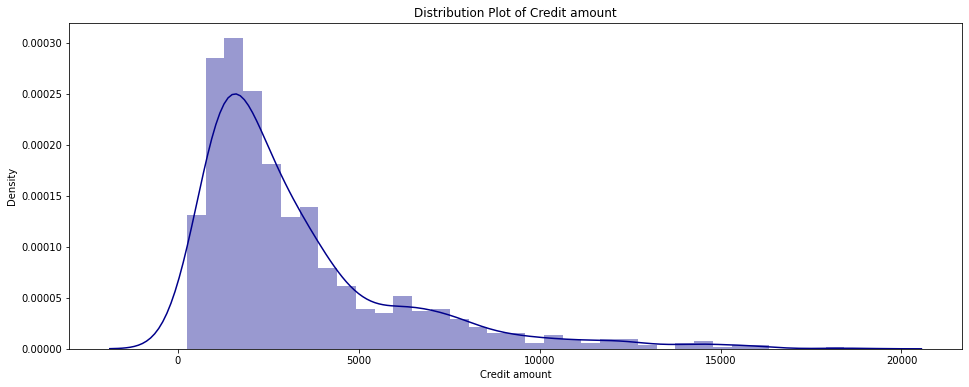

In [15]:
plt.figure(figsize=(16, 6))
sns.distplot(df['Credit amount'], kde = True, color = 'darkblue',
             label = 'Credit amount').set_title('Distribution Plot of Credit amount')

In [16]:
df_job = df.where(df['Job']==0).dropna()
df_job.where(df_job['Credit amount'] >= df['Credit amount'].mean()).dropna()

Age     Sex  Job Housing Saving accounts Checking account  \
347  23.0  female  0.0    rent      quite rich         moderate   
438  65.0    male  0.0     own          little           little   
950  40.0    male  0.0     own          little         moderate   

     Credit amount  Duration   Purpose       Cicil  
347         3758.0      24.0  radio/TV  156.583333  
438         3394.0      42.0   repairs   80.809524  
950         3590.0      18.0  business  199.444444

# Clustering with K-means

In [17]:
from sklearn.cluster import KMeans
import numpy as np

#### - Variabel : Job - Credit Amount - Duration

In [194]:
# Normalisasi menggunakan logaritmik

X = np.asarray(df[["Job", "Credit amount", "Duration"]])
X[:,0] = X[:,0] + 1
# X[:,1] = np.log(X[:,1])
# X[:,2] = np.log(X[:,2])
X = np.log(X)

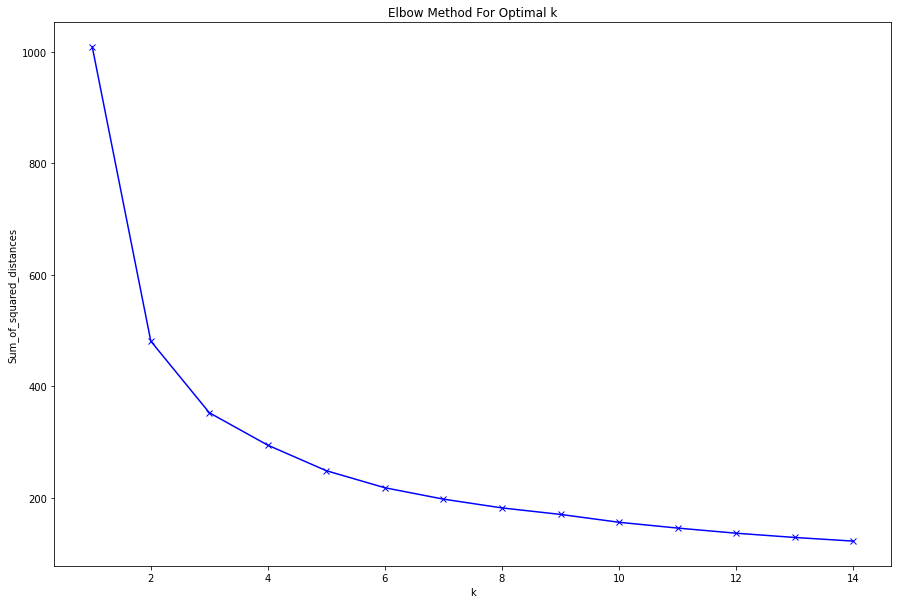

In [195]:
# Mencari Nilai K Menggunakan Elbow Method

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.figure(figsize=(15,10))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [199]:
# Klasterisasi dengan K yang Telah Didapat

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
kmeans.labels_

array([1, 0, 2, 0, 0, 0, 2, 0, 2, 0, 1, 0, 1, 2, 1, 2, 2, 0, 0, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 0, 1, 1, 0, 0, 2, 1, 1, 2, 1, 0, 0,
       0, 1, 2, 1, 0, 2, 2, 0, 1, 2, 2, 1, 0, 0, 2, 0, 1, 1, 2, 0, 2, 0,
       2, 1, 2, 2, 0, 1, 1, 0, 2, 1, 0, 2, 0, 0, 0, 1, 2, 2, 2, 1, 1, 0,
       2, 1, 1, 1, 1, 2, 1, 0, 2, 2, 2, 0, 2, 2, 1, 1, 2, 0, 0, 2, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 0, 0,
       2, 2, 0, 1, 0, 1, 2, 1, 1, 0, 2, 2, 2, 0, 1, 1, 0, 2, 1, 1, 0, 0,
       0, 1, 1, 1, 2, 1, 2, 1, 1, 0, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 0,
       2, 1, 2, 1, 0, 0, 2, 2, 1, 1, 2, 1, 1, 2, 0, 0, 2, 1, 2, 1, 1, 1,
       2, 2, 1, 1, 0, 1, 1, 0, 2, 1, 0, 1, 2, 0, 0, 2, 2, 1, 2, 0, 2, 1,
       1, 1, 1, 2, 2, 2, 0, 0, 1, 2, 0, 2, 2, 1, 1, 2, 0, 2, 1, 2, 1, 1,
       0, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 0, 2, 2, 2, 1, 1, 2, 0, 2,
       1, 1, 0, 2, 0, 1, 2, 1, 0, 0, 0, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 1, 2, 2, 1,

In [200]:
# Evaluasi menggunakan silhoutte score

ss_1 = silhouette_score(X, kmeans.labels_, metric='euclidean')

Grafik klasterisasi Jobs - Credit Amount - Duration


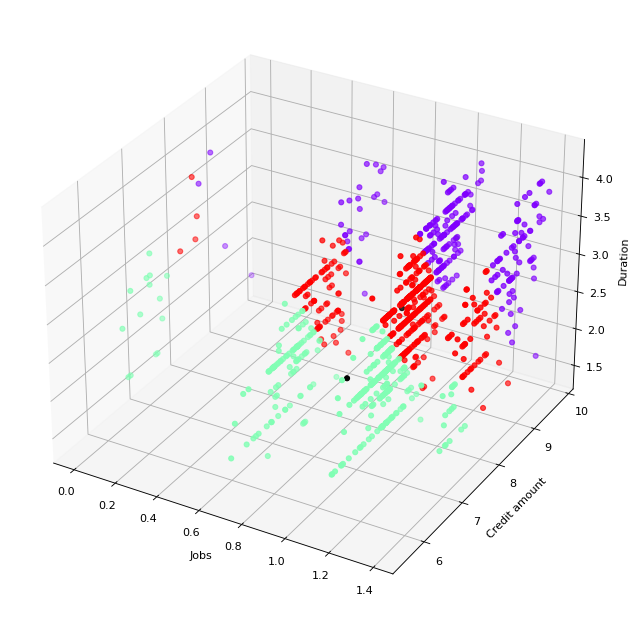

In [201]:
# Visualisasi

fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(X[:,0], X[:,1], X[:,2], c=kmeans.labels_, cmap='rainbow')
ax.scatter3D(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,2], c='black')

xLabel = ax.set_xlabel('Jobs', linespacing=3.2)
yLabel = ax.set_ylabel('Credit amount', linespacing=3.1)
zLabel = ax.set_zlabel('Duration', linespacing=3.4)
print("Grafik klasterisasi Jobs - Credit Amount - Duration")

In [202]:
df['Risk Jobs'] = kmeans.labels_

#### - Variabel : Age - Credit amount - Duration

In [175]:
# Normalisasi

X = np.asarray(df[["Age", "Credit amount", "Duration"]])
X = np.log(X)

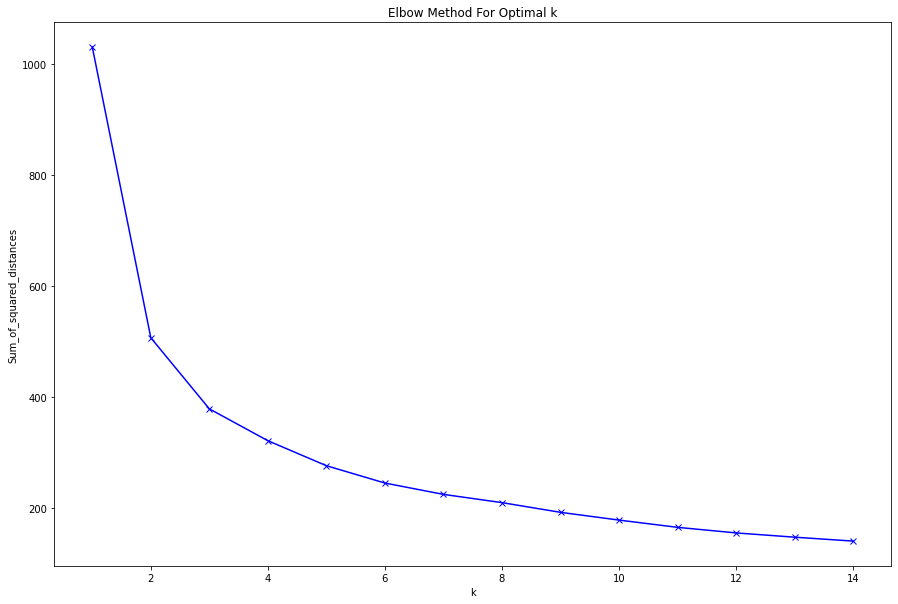

In [176]:
# Mencari Nilai K

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.figure(figsize=(15,10))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [189]:
# Klasterisasi

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
kmeans.labels_

array([2, 0, 1, 0, 0, 0, 1, 0, 1, 0, 2, 0, 2, 1, 2, 1, 1, 0, 0, 1, 2, 2,
       1, 2, 1, 2, 2, 2, 2, 0, 1, 1, 0, 2, 2, 0, 0, 1, 2, 2, 1, 2, 0, 0,
       0, 2, 1, 2, 0, 1, 1, 0, 2, 1, 1, 2, 0, 0, 1, 0, 2, 2, 1, 0, 1, 0,
       1, 2, 1, 1, 0, 2, 2, 0, 1, 2, 0, 1, 0, 0, 0, 2, 1, 1, 1, 2, 2, 0,
       1, 2, 2, 2, 2, 1, 2, 0, 1, 1, 1, 0, 1, 1, 2, 2, 1, 0, 0, 0, 0, 2,
       2, 2, 0, 0, 2, 0, 0, 1, 0, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 0, 0,
       1, 1, 0, 2, 0, 2, 1, 1, 2, 0, 1, 1, 1, 0, 2, 2, 0, 1, 2, 2, 0, 0,
       0, 2, 2, 2, 1, 2, 1, 2, 2, 0, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 0,
       1, 2, 1, 2, 0, 0, 1, 1, 2, 2, 1, 2, 2, 1, 0, 0, 0, 2, 0, 2, 2, 2,
       1, 1, 2, 2, 0, 2, 2, 0, 1, 2, 0, 2, 1, 0, 0, 1, 0, 2, 1, 0, 1, 2,
       2, 2, 2, 1, 1, 1, 0, 0, 2, 1, 0, 1, 1, 2, 2, 1, 0, 1, 2, 1, 2, 2,
       0, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 0, 2, 0, 1, 1, 1, 2, 2, 1, 0, 1,
       2, 2, 0, 1, 0, 2, 1, 2, 0, 0, 0, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 0,
       0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 2, 1, 1, 2,

In [190]:
# Evaluasi silhoutte

ss_2 = silhouette_score(X, kmeans.labels_, metric='euclidean')

Grafik Klasterisasi Age - Credit Amount - Duration


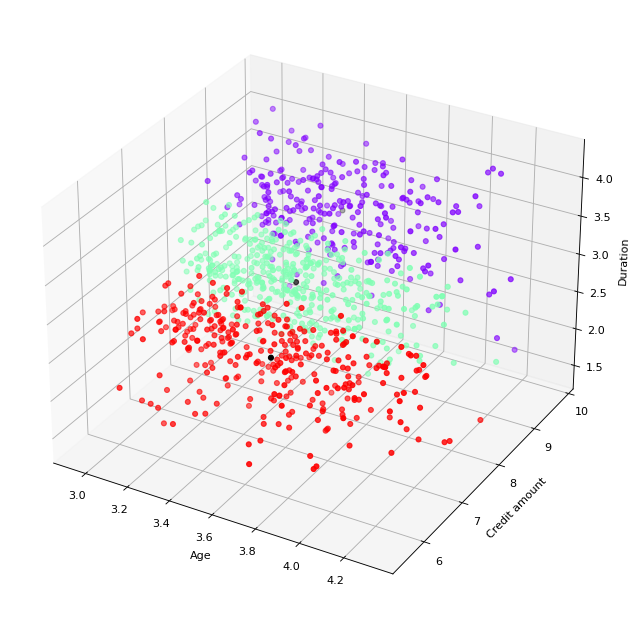

In [191]:
# Visualisasi

fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(X[:,0], X[:,1], X[:,2], c=kmeans.labels_, cmap='rainbow')
ax.scatter3D(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,2], c='black')

xLabel = ax.set_xlabel('Age', linespacing=3.2)
yLabel = ax.set_ylabel('Credit amount', linespacing=3.1)
zLabel = ax.set_zlabel('Duration', linespacing=3.4)
print("Grafik Klasterisasi Age - Credit Amount - Duration")

In [192]:
df['Risk Ages'] = kmeans.labels_

#### -  Variabel : Credit amount - Duration

In [121]:
X = np.asarray(df[["Credit amount", "Duration"]])
X = np.log(X)

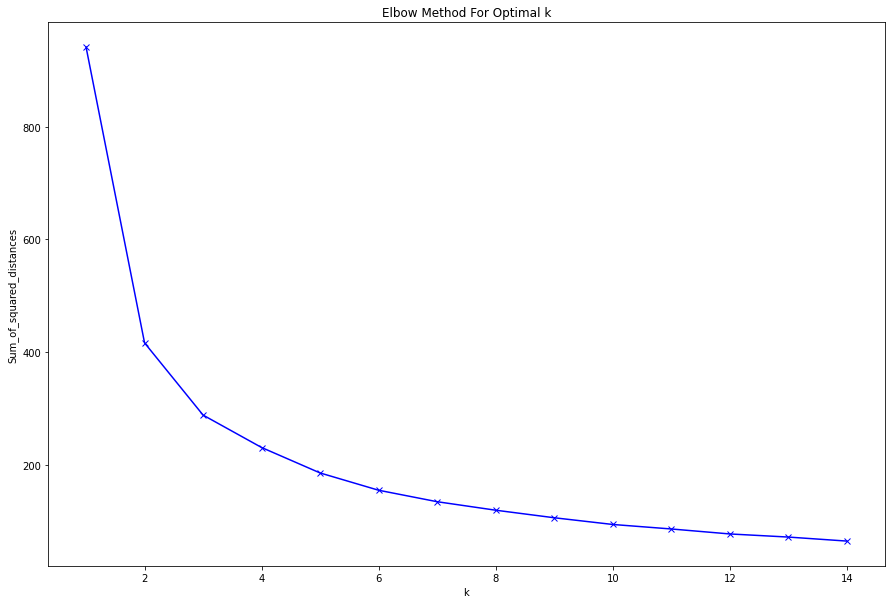

In [132]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.figure(figsize=(15,10))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [170]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
kmeans.labels_

array([1, 2, 0, 2, 2, 2, 0, 2, 0, 2, 1, 2, 1, 0, 1, 0, 0, 2, 2, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 2, 0, 0, 2, 1, 1, 2, 2, 0, 1, 1, 0, 1, 2, 2,
       2, 1, 0, 1, 2, 0, 0, 2, 1, 0, 0, 1, 2, 2, 0, 2, 1, 1, 0, 2, 0, 2,
       0, 1, 0, 0, 2, 1, 1, 2, 0, 1, 2, 0, 2, 2, 2, 1, 0, 0, 0, 1, 1, 2,
       0, 1, 1, 1, 1, 0, 1, 2, 0, 0, 0, 2, 0, 0, 1, 1, 0, 2, 2, 2, 2, 1,
       1, 1, 2, 2, 1, 2, 2, 0, 2, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 2, 2,
       0, 0, 2, 1, 2, 1, 0, 0, 1, 2, 0, 0, 0, 2, 1, 1, 2, 0, 1, 1, 2, 2,
       2, 1, 1, 1, 0, 1, 0, 1, 1, 2, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 2,
       0, 1, 0, 1, 2, 2, 0, 0, 1, 1, 0, 1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 1,
       0, 0, 1, 1, 2, 1, 1, 2, 0, 1, 2, 1, 0, 2, 2, 0, 2, 1, 0, 2, 0, 1,
       1, 1, 1, 0, 0, 0, 2, 2, 1, 0, 2, 0, 0, 1, 1, 0, 2, 0, 1, 0, 1, 1,
       2, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 2, 1, 2, 0, 0, 0, 1, 1, 0, 2, 0,
       1, 1, 2, 0, 2, 1, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 2,
       2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 0, 1, 0, 0, 1,

In [171]:
ss_3 = silhouette_score(X, kmeans.labels_, metric='euclidean')

Grafik klasterisasi Duration - Credit Amount


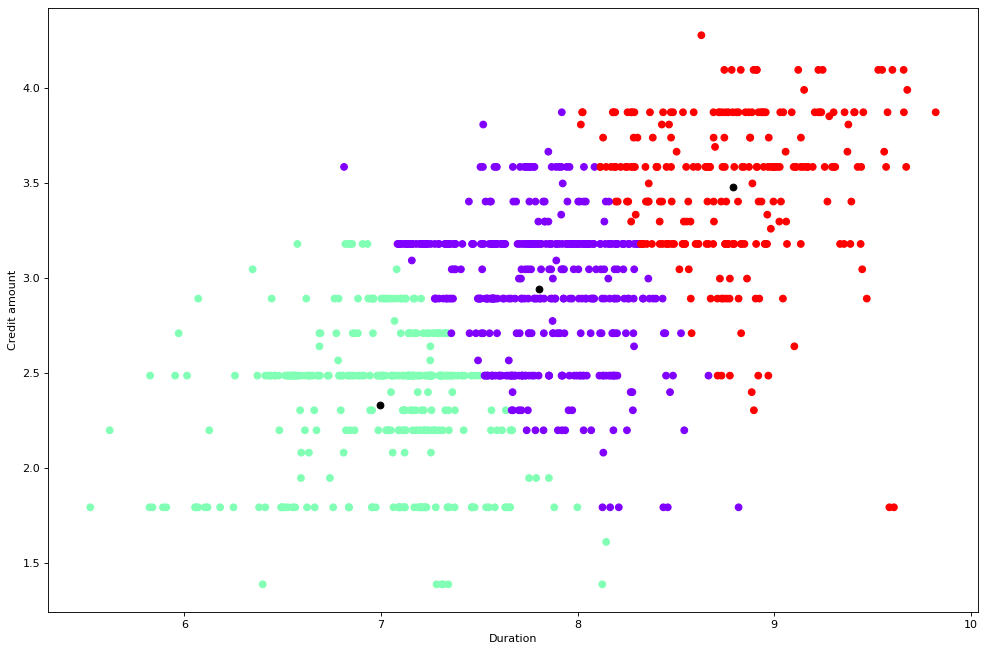

In [172]:
fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')

plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')

plt.xlabel('Duration')
plt.ylabel('Credit amount')

print("Grafik klasterisasi Duration - Credit Amount")

In [173]:
df['Risks'] = kmeans.labels_

#### -  Variabel : Cicil - Age

In [112]:
X = np.asarray(df[["Cicil", "Age"]])
X = np.log(X)

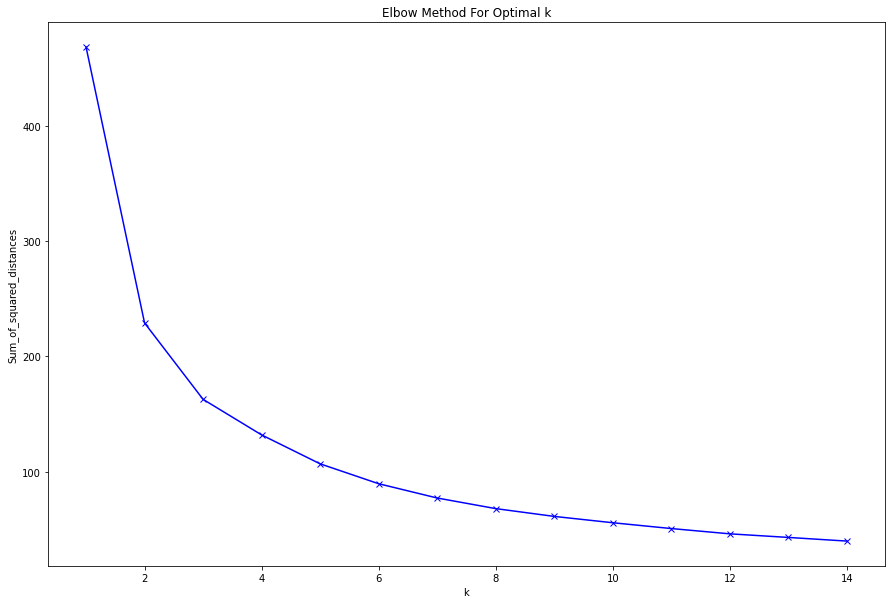

In [113]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.figure(figsize=(15,10))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [115]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
kmeans.labels_

array([2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 0, 1, 0, 1, 0, 1, 2, 2, 1, 2, 2,
       2, 1, 2, 2, 0, 0, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 0, 1, 2, 2,
       1, 1, 0, 2, 2, 1, 1, 2, 1, 1, 0, 1, 2, 2, 1, 1, 1, 1, 0, 2, 1, 2,
       1, 0, 0, 0, 2, 1, 1, 1, 0, 1, 1, 2, 1, 1, 2, 0, 0, 0, 2, 1, 0, 2,
       1, 1, 0, 1, 0, 1, 1, 2, 1, 1, 0, 2, 0, 0, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 0, 2, 2, 1, 0, 1, 2, 1, 2, 0, 1, 1, 0, 1, 1, 0, 0, 1, 2, 1, 1,
       1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 2, 1, 1, 2,
       2, 1, 1, 0, 1, 2, 1, 0, 0, 2, 0, 2, 0, 1, 1, 0, 0, 0, 0, 1, 1, 2,
       2, 0, 1, 0, 2, 1, 0, 1, 0, 0, 2, 0, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0,
       1, 2, 1, 1, 1, 0, 1, 2, 1, 1, 2, 1, 2, 1, 2, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 2, 0, 2, 2, 1, 1, 1, 2, 1, 0, 2, 0, 2, 1, 1, 0, 0, 2,
       1, 1, 2, 0, 0, 2, 0, 0, 1, 1, 0, 1, 2, 1, 1, 1, 2, 1, 1, 0, 2, 2,
       1, 0, 1, 0, 2, 0, 1, 1, 2, 0, 2, 2, 1, 1, 2, 0, 2, 1, 0, 1, 1, 2,
       1, 1, 0, 0, 0, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1,

In [116]:
ss_4 = silhouette_score(X, kmeans.labels_, metric='euclidean')

Grafik klasterisasi Cicil - Age


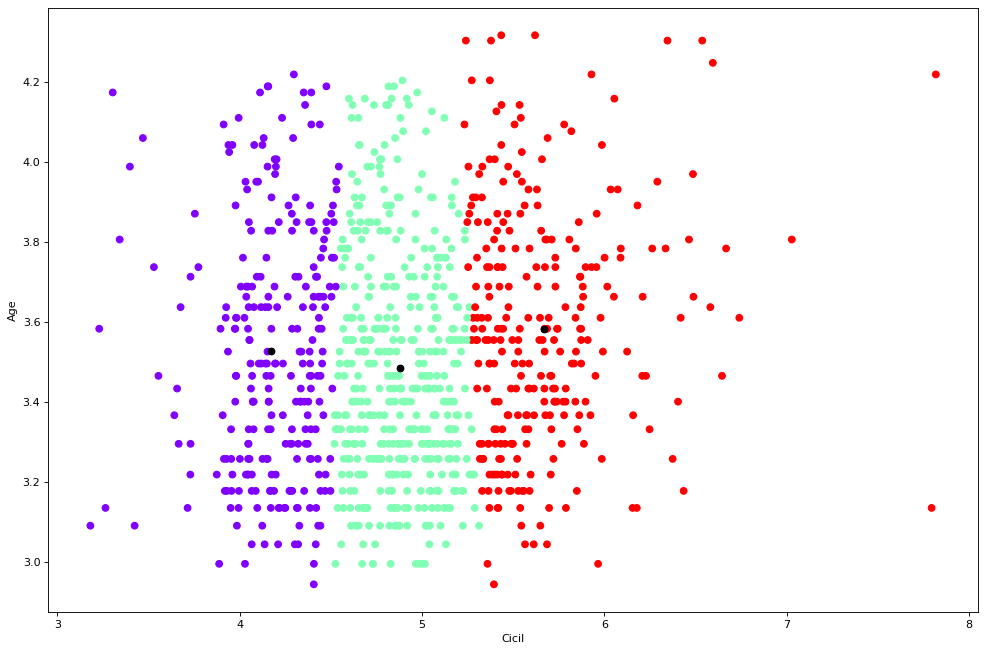

In [117]:
fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')

plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')

plt.xlabel('Cicil')
plt.ylabel('Age')

print("Grafik klasterisasi Cicil - Age")

In [118]:
df['Risk Cicil'] = kmeans.labels_

In [203]:
df.sort_values(by='Cicil', ascending=False).head()

Age     Sex  Job Housing Saving accounts Checking account  Credit amount  \
917   68    male    3     own          little           little          14896   
236   23    male    0     own             NaN         moderate          14555   
738   45    male    3     own          little              NaN           6761   
734   37  female    2     own          little              NaN           3380   
693   44    male    1     own             NaN           little           4716   

     Duration Purpose        Cicil  Risk Jobs  Risk Ages  Risks  Risk Cicil  
917         6     car  2482.666667          0          0      2           2  
236         6     car  2425.833333          0          0      2           2  
738         6     car  1126.833333          2          1      0           2  
734         4     car   845.000000          1          2      1           2  
693         6     car   786.000000          2          1      0           2

In [204]:
df_result = df.drop(columns=['Cicil', 'Risk Jobs', 'Risk Ages', 'Risks', 'Risk Cicil'])
df_result.head()

Age     Sex  Job Housing Saving accounts Checking account  Credit amount  \
0   67    male    2     own             NaN           little           1169   
1   22  female    2     own          little         moderate           5951   
2   49    male    1     own          little              NaN           2096   
3   45    male    2    free          little           little           7882   
4   53    male    2    free          little           little           4870   

   Duration              Purpose  
0         6             radio/TV  
1        48             radio/TV  
2        12            education  
3        42  furniture/equipment  
4        24                  car

# Summary of Silhouette Score

In [218]:
print('silhouette  Job - Credit amount - Duration : ', ss_1) 
print('silhouette  Age - Credit amount - Duration : ', ss_2) 
print('silhouette  Credit amount - Duration       : ', ss_3) 
print('silhouette  Cicil - Age                    : ', ss_4) 

silhouette  Job - Credit amount - Duration :  0.3391885552668648
silhouette  Age - Credit amount - Duration :  0.31428516325465067
silhouette  Credit amount - Duration       :  0.3775215571775447
silhouette  Cicil - Age                    :  0.3616570452494267


In [219]:
X = np.asarray(df[["Credit amount", "Duration"]])
X = np.log(X)

In [220]:
silhouette = []
K = range(3,6)
for k in K:
    km = KMeans(n_clusters=k)
    km.fit(X)
    ss = silhouette_score(X, km.labels_, metric='euclidean')
    silhouette.append(ss)
    
pd.DataFrame({'K' : K, 'Silhouette' : silhouette})

K  Silhouette
0  3    0.377522
1  4    0.382924
2  5    0.352547

In [221]:
km = KMeans(n_clusters=4)
km.fit(X)

KMeans(n_clusters=4)

In [222]:
df_result['Risk'] = km.labels_

In [223]:
df_result

Age     Sex  Job Housing Saving accounts Checking account  Credit amount  \
0     67    male    2     own             NaN           little           1169   
1     22  female    2     own          little         moderate           5951   
2     49    male    1     own          little              NaN           2096   
3     45    male    2    free          little           little           7882   
4     53    male    2    free          little           little           4870   
..   ...     ...  ...     ...             ...              ...            ...   
995   31  female    1     own          little              NaN           1736   
996   40    male    3     own          little           little           3857   
997   38    male    2     own          little              NaN            804   
998   23    male    2    free          little           little           1845   
999   27    male    2     own        moderate         moderate           4576   

     Duration              Purpose  Risk  
0           6             radio/TV     3  
1          48             radio/TV     2  
2          12            education     1  
3          42  furniture/equipment     2  
4          24                  car     2  
..        ...                  ...   ...  
995        12  furniture/equipment     1  
996        30                  car     0  
997        12             radio/TV     3  
998        45             radio/TV     0  
999        45                  car     2  

[1000 rows x 10 columns]

#### Klasifikasi Credit Risk

0 : Bad <br/>
1 : Medium <br/>
2 : Good <br/>
3 : Very Good <br/>